In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib as mpl
import plotly.express as px

mpl.rc('font', family='Malgun Gothic')

In [2]:
df1 = pd.read_csv('Log_Data02.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344299 entries, 0 to 344298
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   거래일자      344299 non-null  int64  
 1   수수료율      344299 non-null  float64
 2   고객ID      344299 non-null  int64  
 3   프로그램수정횟수  344299 non-null  float64
 4   추가결제금액    344299 non-null  int64  
 5   거래취소여부    4597 non-null    float64
 6   거래취소일자    4597 non-null    float64
 7   서비스명      344277 non-null  object 
 8   판매자       344277 non-null  object 
 9   판매금액      344278 non-null  float64
 10  서비스가격     344277 non-null  float64
 11  평점        344277 non-null  float64
 12  이용자수      344277 non-null  float64
 13  대분류       344277 non-null  object 
 14  서비스번호     344277 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 39.4+ MB


In [3]:
df1.describe()

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,판매금액,서비스가격,평점,이용자수,서비스번호
count,3.442990e+05,344299.000000,3.442990e+05,344299.000000,3.442990e+05,4597.0,4.597000e+03,3.442780e+05,3.442770e+05,344277.000000,344277.000000,344277.000000
mean,2.021037e+07,6.950001,3.870641e+10,0.173583,3.998393e+03,1.0,2.021034e+07,6.299230e+04,6.038945e+04,4.832186,54.798706,3034.824002
std,1.721111e+02,0.788989,3.659226e+10,0.722254,9.074907e+03,0.0,5.503989e+02,2.568308e+05,2.575478e+05,0.809270,90.533001,857.273248
min,2.021010e+07,6.500000,1.010102e+08,-1.000000,0.000000e+00,1.0,2.020123e+07,0.000000e+00,5.000000e+03,0.000000,0.000000,2102.000000
25%,2.021022e+07,6.500000,6.030206e+09,0.000000,0.000000e+00,1.0,2.021021e+07,1.000000e+04,9.000000e+03,5.000000,8.000000,2377.000000
50%,2.021040e+07,6.500000,1.307050e+10,0.000000,0.000000e+00,1.0,2.021040e+07,2.395000e+04,2.000000e+04,5.000000,22.000000,2788.000000
75%,2.021052e+07,7.500000,6.040301e+10,0.000000,6.500000e+03,1.0,2.021052e+07,5.000000e+04,5.000000e+04,5.000000,62.000000,3435.000000
max,2.021063e+07,9.000000,1.501042e+11,119.000000,1.445200e+06,1.0,2.021063e+07,4.400000e+07,4.400000e+07,5.000000,584.000000,6496.000000


In [4]:
df_11 = df1.loc[df1['평점'] != 0]
df_11

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
0,20210201,6.5,5030100140,0.0,9800,NaN,NaN,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0
1,20210201,6.5,8020105385,0.0,0,NaN,NaN,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0
2,20210201,6.5,110104033157,0.0,9200,NaN,NaN,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0
3,20210201,7.5,40203001176,0.0,11000,NaN,NaN,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0
4,20210201,6.5,5041700297,0.0,0,NaN,NaN,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344294,20210630,9.0,50150001196,0.0,0,NaN,NaN,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0
344295,20210630,7.5,60107010137,0.0,0,NaN,NaN,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0
344296,20210630,9.0,70406002101,0.0,0,NaN,NaN,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0
344297,20210630,6.5,9010306354,0.0,0,NaN,NaN,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'UnReal'),
  Text(1, 0, '게임'),
  Text(2, 0, '기타'),
  Text(3, 0, '기획'),
  Text(4, 0, '데이터'),
  Text(5, 0, '디자인'),
  Text(6, 0, '모바일'),
  Text(7, 0, '인공지능'),
  Text(8, 0, '커머스'),
  Text(9, 0, '프로그래밍'),
  Text(10, 0, '프로그램'),
  Text(11, 0, '홈페이지')])

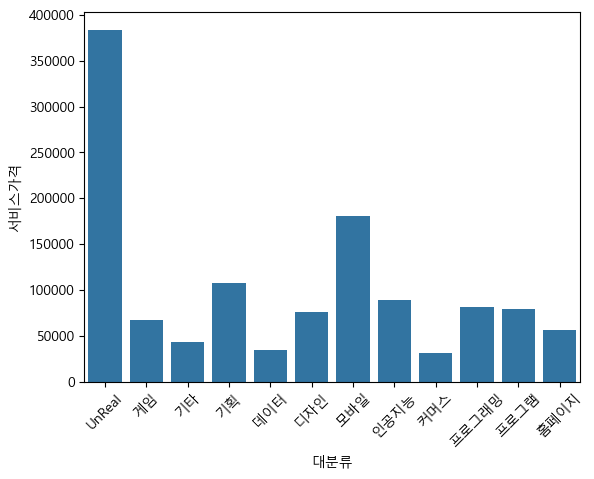

In [5]:
p1 = df1.pivot_table(index = '대분류', values = '서비스가격', aggfunc = 'mean').reset_index()
sns.barplot(data = p1, x = '대분류', y = '서비스가격',)
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'UnReal'),
  Text(1, 0, '게임'),
  Text(2, 0, '기타'),
  Text(3, 0, '기획'),
  Text(4, 0, '데이터'),
  Text(5, 0, '디자인'),
  Text(6, 0, '모바일'),
  Text(7, 0, '인공지능'),
  Text(8, 0, '커머스'),
  Text(9, 0, '프로그래밍'),
  Text(10, 0, '프로그램'),
  Text(11, 0, '홈페이지')])

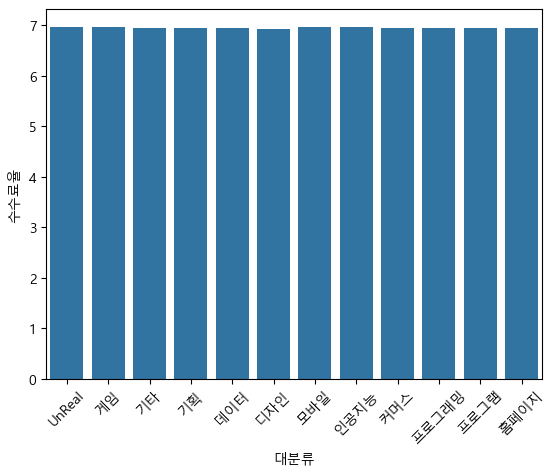

In [6]:
p1 = df1.pivot_table(index = '대분류', values = '수수료율', aggfunc = 'mean').reset_index()
sns.barplot(data = p1, x = '대분류', y = '수수료율')
plt.xticks(rotation = 45)

In [7]:
# 판매금액 = 서비스가격 + 추가결제금액
# p1 = df1.pivot_table(index = '대분류', values = '서비스가격', aggfunc = 'mean').reset_index()
p2 = df1.loc[df1['대분류'] == '커머스']
# px.box(df1, x = '대분류', y = '서비스가격')
p2['서비스가격'].describe()

count    2.680200e+04
mean     3.126203e+04
std      1.079308e+05
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.980000e+06
Name: 서비스가격, dtype: float64

In [8]:
from scipy.stats import trim_mean

# 상위와 하위 10%의 데이터를 잘라낸 평균
trimmed_mean = trim_mean(p2['서비스가격'], proportiontocut = 0.05)
trimmed_mean

# IQR 계산
Q1 = p2['서비스가격'].quantile(0.25)
Q3 = p2['서비스가격'].quantile(0.75)
IQR = Q3 - Q1

# 절단 평균을 기준으로 적정 가격 범위 설정
lower_bound = trimmed_mean - 0.5 * IQR
upper_bound = trimmed_mean + 0.5 * IQR

print("적정 가격 범위:", lower_bound, "부터", upper_bound)

적정 가격 범위: 7461.363071055468 부터 17461.363071055468


In [9]:
# 고객-판매자 매칭 데이터 생성
customer_seller_group = df_11.groupby(['고객ID', '판매자']).size().reset_index(name='거래 횟수')

# 판매자별 재거래 고객 수 계산 (거래 횟수가 2회 이상인 경우)
repeat_customers = customer_seller_group[customer_seller_group['거래 횟수'] > 1].groupby('판매자').size().reset_index(name='재거래 고객 수')

# 판매자별 전체 고객 수 계산
total_customers = df_11.groupby('판매자')['고객ID'].nunique().reset_index(name='전체 고객 수')

# 전체 판매자와 재거래 고객 수 병합 (재거래 고객 수가 없는 판매자는 0으로 처리)
reorder_rate = pd.merge(total_customers, repeat_customers, on='판매자', how='left').fillna(0)

# 재거래율 계산
reorder_rate['재거래율'] = reorder_rate['재거래 고객 수'] / reorder_rate['전체 고객 수'] * 100

reorder_rate

,판매자,전체 고객 수,재거래 고객 수,재거래율
0,0to1,16,0.0,0.000000
1,100ME,426,7.0,1.643192
2,10xDeveloper,175,0.0,0.000000
3,10년차웹개발자,158,0.0,0.000000
4,12년차기획전문가,1143,33.0,2.887139
...,...,...,...,...
1757,효베르,1568,32.0,2.040816
1758,효율자동화쟁이,3,0.0,0.000000
1759,흐,3,0.0,0.000000
1760,희몽,5,0.0,0.000000


In [10]:
# 판매자별 성사된 거래 건수 계산
seller_transaction_count = df1.groupby('판매자').size().reset_index(name='성사된 거래 건수')
seller_transaction_count.sort_values(by = '성사된 거래 건수', ascending = False)

,판매자,성사된 거래 건수
1341,시스픽스,4180
1305,스마트dda,3738
759,개밥그릇,2924
1500,오즈의해결사,2851
1659,이지엑셀,2729
...,...,...
26,925Company,1
1096,마케팅여기요,1
1097,마케팅전문가가도움드립니다,1
1053,라피네풍,1


In [11]:
df2 = pd.read_csv('Customer_data.csv')
df2

,고객ID,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
0,1001010041,iPhone,iOS11.4.1,유튜브,정상회원,경기도,25.0,남성,1,44500.0,0.0,14500
1,10010100410,SM-N935S,Android7.0,검색광고,정상회원,경기도,26.0,NaN,1,44500.0,0.0,14500
2,100101004108,iPhone,iOS12.0,네이버블로그,정상회원,경기도,23.0,남성,1,34500.0,0.0,14500
3,100101004109,iPhone,iOS11.4.1,인스타그램,정상회원,경기도,20.0,남성,1,364500.0,0.0,14500
4,100101004112,iPhone,iOS11.4.1,직접검색,정상회원,경기도,28.0,남성,1,34500.0,0.0,14500
...,...,...,...,...,...,...,...,...,...,...,...,...
137521,9050206990,SM-N950N,Android8.0.0,유튜브,정상회원,경상도,21.0,남성,2,75000.0,0.0,20000
137522,9050206992,iPhone,iOS11.4,네이버카페,탈퇴,강원도,26.0,NaN,1,310000.0,0.0,10000
137523,9050206995,iPhone,iOS12.0,인스타그램,정상회원,강원도,28.0,남성,1,89000.0,0.0,10000
137524,9050206996,SM-G930S,Android8.0.0,네이버블로그,정상회원,강원도,43.0,남성,1,9000.0,1.0,4000


In [12]:
df3 = pd.read_csv('Service_Data.csv')
df3

,서비스명,판매자,서비스가격,평점,대분류,서비스번호,판매수
0,"""P2P 대출"" 서비스를 위한 기획을 해 드립니다.",디자인쇼크리더,400000.0,0.0,기획,5651.0,6
1,"""반응형 웹 퍼블리싱"" 모든 퍼블리싱 작업 맞춤 진행",ThunDesign,15000.0,0.0,홈페이지,6122.0,1
2,"""이커머스 웹 사이트개발 경력자""의 쇼핑몰 제작",IAMTRY,500000.0,0.0,커머스,6152.0,3
3,.NET C# 개발. WPF 또는 WinForms,혼살,1200000.0,5.0,프로그래밍,5009.0,1
4,".NET, c# 응용프로그램 개발, delphi",JAVASCRIPT,60000.0,5.0,프로그램,4419.0,10
...,...,...,...,...,...,...,...
4154,"회로 설계 , PCB Artwork, 시제품 개발해 드립니다.",mangolab,50000.0,5.0,프로그래밍,4985.0,7
4155,"회로 설계, PCB 제작, 아두이노, 3D 프린팅",이즈Circuit,55000.0,4.9,프로그래밍,2390.0,18
4156,회로/PCB/펌웨어/AVR/아두이노제작 해 드립니다.,SWMJ,25000.0,5.0,UnReal,3141.0,3
4157,효과적인 연락처 수집용 랜딩페이지 제작해 드립니다.,안단테연구소,300000.0,5.0,프로그래밍,4911.0,6


In [13]:
df4 = pd.read_csv('Expert_Data.csv')
df4

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
0,V2_0,김러그,326,147927420,가입,미사용
1,V2_1,디프라이,43,146832200,가입,미사용
2,V2_2,Sailorkr,14,140029000,가입,미사용
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용
4,V2_4,에픽핫,18,126229400,가입,미사용
...,...,...,...,...,...,...
2061,V2_2061,web3expert,1,7800,미가입,미사용
2062,V2_2062,enos,2,6950,미가입,미사용
2063,V2_2063,K9027456501,1,5000,미가입,미사용
2064,V2_2064,승쿠딩,1,5000,가입,미사용


In [14]:
expert_df = pd.merge(df4, reorder_rate, on = '판매자', how = 'inner')
expert_df

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,전체 고객 수,재거래 고객 수,재거래율
0,V2_0,김러그,326,147927420,가입,미사용,323,3.0,0.928793
1,V2_4,에픽핫,18,126229400,가입,미사용,18,0.0,0.000000
2,V2_5,앱플랫폼만드는전문가,6,99299800,가입,미사용,6,0.0,0.000000
3,V2_6,한길소프트,6,99050900,가입,미사용,6,0.0,0.000000
4,V2_7,김케이9089,93,94820200,가입,미사용,93,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
1757,V2_2061,web3expert,1,7800,미가입,미사용,1,0.0,0.000000
1758,V2_2062,enos,2,6950,미가입,미사용,2,0.0,0.000000
1759,V2_2063,K9027456501,1,5000,미가입,미사용,1,0.0,0.000000
1760,V2_2064,승쿠딩,1,5000,가입,미사용,1,0.0,0.000000


In [15]:
df_p = df_11.pivot_table(index = '판매자', values = ['평점'], aggfunc = 'mean').reset_index()
df_p

,판매자,평점
0,0to1,5.000000
1,100ME,5.000000
2,10xDeveloper,4.941714
3,10년차웹개발자,4.907595
4,12년차기획전문가,4.800000
...,...,...
1757,효베르,5.000000
1758,효율자동화쟁이,5.000000
1759,흐,3.700000
1760,희몽,5.000000


In [16]:
expert_df2 = pd.merge(expert_df, df_p, on = '판매자', how = 'inner')
expert_df2

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,전체 고객 수,재거래 고객 수,재거래율,평점
0,V2_0,김러그,326,147927420,가입,미사용,323,3.0,0.928793,5.0
1,V2_4,에픽핫,18,126229400,가입,미사용,18,0.0,0.000000,5.0
2,V2_5,앱플랫폼만드는전문가,6,99299800,가입,미사용,6,0.0,0.000000,5.0
3,V2_6,한길소프트,6,99050900,가입,미사용,6,0.0,0.000000,5.0
4,V2_7,김케이9089,93,94820200,가입,미사용,93,0.0,0.000000,5.0
...,...,...,...,...,...,...,...,...,...,...
1757,V2_2061,web3expert,1,7800,미가입,미사용,1,0.0,0.000000,5.0
1758,V2_2062,enos,2,6950,미가입,미사용,2,0.0,0.000000,5.0
1759,V2_2063,K9027456501,1,5000,미가입,미사용,1,0.0,0.000000,5.0
1760,V2_2064,승쿠딩,1,5000,가입,미사용,1,0.0,0.000000,5.0


In [17]:
alarm_on_data = expert_df2.loc[expert_df2['신속 알람 서비스 사용여부'] == '사용']
alarm_off_data = expert_df2.loc[expert_df2['신속 알람 서비스 사용여부'] == '미사용']

In [18]:
stats.normaltest(alarm_on_data['판매 서비스 수'])

NormaltestResult(statistic=np.float64(186.6178698961495), pvalue=np.float64(2.99532836917528e-41))

In [19]:
stats.normaltest(alarm_off_data['판매 서비스 수'])

NormaltestResult(statistic=np.float64(2528.201656737656), pvalue=np.float64(0.0))

C:\Users\magne\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


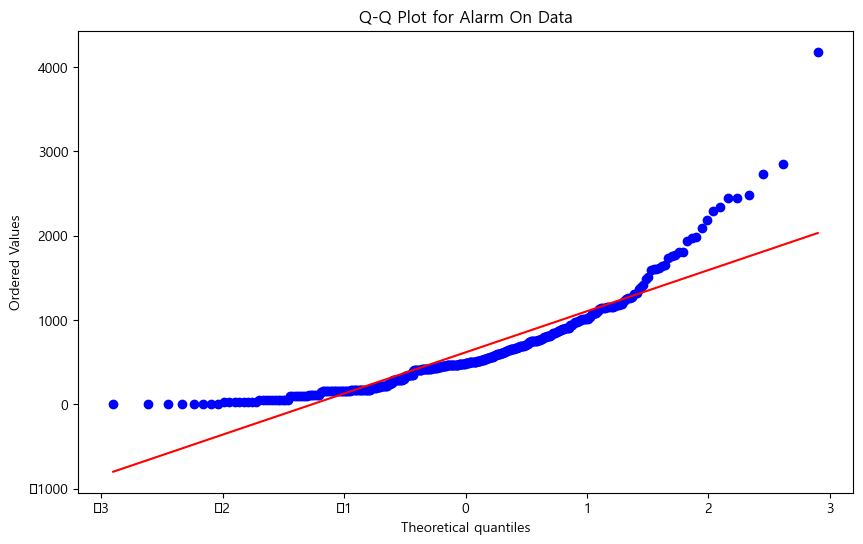

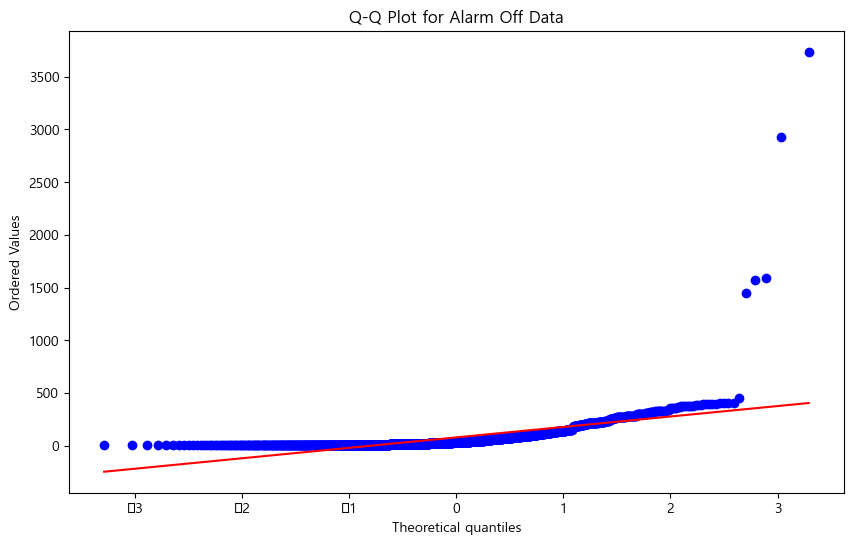

In [20]:
# Q-Q Plot for Alarm On Data
plt.figure(figsize = (10, 6))
stats.probplot(alarm_on_data['판매 서비스 수'], dist = "norm", plot = plt)
plt.title("Q-Q Plot for Alarm On Data")
plt.show()

# Q-Q Plot for Alarm Off Data
plt.figure(figsize = (10, 6))
stats.probplot(alarm_off_data['판매 서비스 수'], dist = "norm", plot = plt)
plt.title("Q-Q Plot for Alarm Off Data")
plt.show()

In [21]:
# Mann-Whitney U 테스트 수행
u_statistic, p_value = stats.mannwhitneyu(alarm_on_data['판매 서비스 수'], alarm_off_data['판매 서비스 수'], alternative = 'two-sided')

print(f"Mann-Whitney U Test Statistic: {u_statistic}")
print(f"P-value: {p_value}")

# 결과 해석
if p_value < 0.05:
    print("두 집단 간의 판매 서비스 수에 유의미한 차이가 있다.")
else:
    print("두 집단 간의 판매 서비스 수에 유의미한 차이가 없다.")

Mann-Whitney U Test Statistic: 480091.0
P-value: 1.2322472191310021e-141
두 집단 간의 판매 서비스 수에 유의미한 차이가 있다.


In [22]:
premium_data = expert_df2.loc[expert_df2['프리미엄 서비스 가입여부'] == '가입']
non_premium_data = expert_df2.loc[expert_df2['프리미엄 서비스 가입여부'] == '미가입']

In [23]:
stats.normaltest(premium_data['판매 서비스 수'])

NormaltestResult(statistic=np.float64(154.83089849605838), pvalue=np.float64(2.392751391802031e-34))

In [24]:
stats.normaltest(non_premium_data['판매 서비스 수'])

NormaltestResult(statistic=np.float64(1434.0680844359892), pvalue=np.float64(0.0))

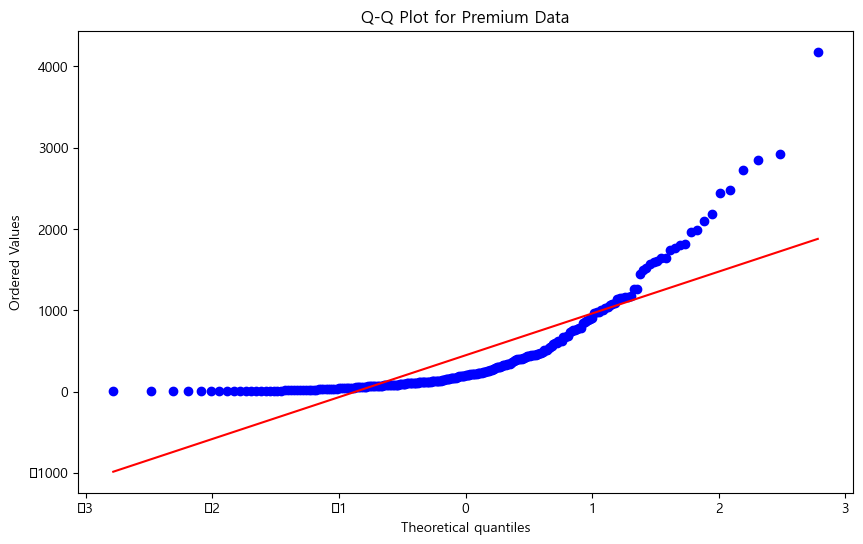

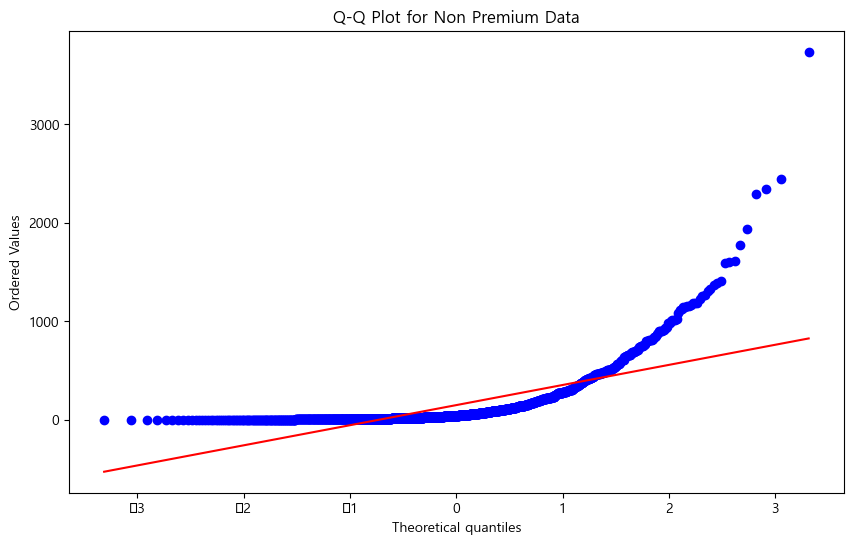

In [25]:
# Q-Q Plot for Alarm On Data
plt.figure(figsize = (10, 6))
stats.probplot(premium_data['판매 서비스 수'], dist = "norm", plot = plt)
plt.title("Q-Q Plot for Premium Data")
plt.show()

# Q-Q Plot for Alarm Off Data
plt.figure(figsize = (10, 6))
stats.probplot(non_premium_data['판매 서비스 수'], dist = "norm", plot = plt)
plt.title("Q-Q Plot for Non Premium Data")
plt.show()

In [26]:
# Mann-Whitney U 테스트 수행
u_statistic, p_value = stats.mannwhitneyu(premium_data['판매 서비스 수'], non_premium_data['판매 서비스 수'], alternative = 'two-sided')

print(f"Mann-Whitney U Test Statistic: {u_statistic}")
print(f"P-value: {p_value}")

# 결과 해석
if p_value < 0.05:
    print("두 집단 간의 판매 서비스 수에 유의미한 차이가 있다.")
else:
    print("두 집단 간의 판매 서비스 수에 유의미한 차이가 없다.")

Mann-Whitney U Test Statistic: 281477.0
P-value: 1.506862272164777e-31
두 집단 간의 판매 서비스 수에 유의미한 차이가 있다.


In [27]:
df4

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
0,V2_0,김러그,326,147927420,가입,미사용
1,V2_1,디프라이,43,146832200,가입,미사용
2,V2_2,Sailorkr,14,140029000,가입,미사용
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용
4,V2_4,에픽핫,18,126229400,가입,미사용
...,...,...,...,...,...,...
2061,V2_2061,web3expert,1,7800,미가입,미사용
2062,V2_2062,enos,2,6950,미가입,미사용
2063,V2_2063,K9027456501,1,5000,미가입,미사용
2064,V2_2064,승쿠딩,1,5000,가입,미사용


In [28]:
seller_df = df4.pivot_table(index = '판매자', values = '판매 서비스 수',
                            aggfunc = 'sum').sort_values(by = '판매 서비스 수', ascending = False).reset_index()
# sns.barplot(data = seller_df, x = '판매자', y = '판매 서비스 수')
# plt.xticks(rotation = 90)
seller_df['판매 서비스 수'].quantile(0.8)

np.float64(219.0)

In [29]:
df4.sort_values(by= '판매 서비스 수' , ascending = False).head(int(len(df4)*0.1))

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
31,V2_31,시스픽스,4180,60150440,가입,사용
104,V2_104,스마트dda,3738,44589500,미가입,미사용
13,V2_13,개밥그릇,2924,75635570,가입,미사용
179,V2_179,오즈의해결사,2851,35391800,가입,사용
89,V2_89,이지엑셀,2729,46453680,가입,사용
...,...,...,...,...,...,...
418,V2_418,임베디드산업용시스템개발,474,18899950,미가입,사용
445,V2_445,show4you,473,17965560,미가입,사용
787,V2_787,터렛짓는다,471,8001510,미가입,사용
658,V2_658,긁적,471,10679580,미가입,사용


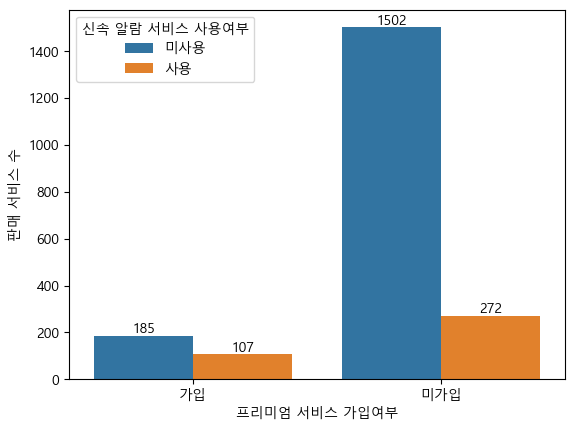

In [62]:
df_4 = df4.pivot_table(index = ['프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부'], values = '판매 서비스 수', aggfunc = 'count').reset_index()
ax = sns.barplot(data = df_4, x = '프리미엄 서비스 가입여부', y = '판매 서비스 수', hue = '신속 알람 서비스 사용여부')
plt.ylabel('판매 서비스 수')
# 값 레이블 추가
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [74]:
p2 = df4.pivot_table(index=['프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부'],values = '판매 서비스 수', aggfunc = 'mean')
p2 = p2.rename(columns={'판매 서비스 수' : '평균 판매 서비스 수'}).reset_index()
p2
data_1 = df4.loc[(df4['프리미엄 서비스 가입여부'] == '가입') & (df4['신속 알람 서비스 사용여부'] == '사용')]
data_2 = df4.loc[(df4['프리미엄 서비스 가입여부'] == '미가입') & (df4['신속 알람 서비스 사용여부'] == '사용')]

In [75]:
stats.normaltest(data_1['판매 서비스 수'])

NormaltestResult(statistic=np.float64(48.920015898438905), pvalue=np.float64(2.3831617530405792e-11))

In [76]:
stats.normaltest(data_2['판매 서비스 수'])

NormaltestResult(statistic=np.float64(93.22305601522723), pvalue=np.float64(5.713083784724543e-21))

In [77]:
# Mann-Whitney U 테스트 수행
u_statistic, p_value = stats.mannwhitneyu(data_1['판매 서비스 수'], data_2['판매 서비스 수'], alternative = 'two-sided')

print(f"Mann-Whitney U Test Statistic: {u_statistic}")
print(f"P-value: {p_value}")

# 결과 해석
if p_value < 0.05:
    print("두 집단 간의 판매 서비스 수에 유의미한 차이가 있다.")
else:
    print("두 집단 간의 판매 서비스 수에 유의미한 차이가 없다.")

Mann-Whitney U Test Statistic: 18841.0
P-value: 7.924085323600293e-06
두 집단 간의 판매 서비스 수에 유의미한 차이가 있다.


In [31]:
df1['매출'] = df1['판매금액'] * df1['수수료율'] * 0.01
df_p2 = df1.pivot_table(index = '판매자', values = '매출', aggfunc = 'sum')
df_p2

,매출
판매자,
0to1,7792.00
100ME,2670948.80
10xDeveloper,325178.60
10년차웹개발자,272124.90
123abc,21859.50
...,...
효베르,1613193.75
효율자동화쟁이,2050.00
흐,13054.00


In [32]:
expert_df3 = pd.merge(expert_df2, df_p2, on = '판매자', how = 'inner')
expert_df3

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,전체 고객 수,재거래 고객 수,재거래율,평점,매출
0,V2_0,김러그,326,147927420,가입,미사용,323,3.0,0.928793,5.0,10068071.15
1,V2_4,에픽핫,18,126229400,가입,미사용,18,0.0,0.000000,5.0,8722822.50
2,V2_5,앱플랫폼만드는전문가,6,99299800,가입,미사용,6,0.0,0.000000,5.0,6940631.50
3,V2_6,한길소프트,6,99050900,가입,미사용,6,0.0,0.000000,5.0,7179450.75
4,V2_7,김케이9089,93,94820200,가입,미사용,93,0.0,0.000000,5.0,6588321.50
...,...,...,...,...,...,...,...,...,...,...,...
1757,V2_2061,web3expert,1,7800,미가입,미사용,1,0.0,0.000000,5.0,416.00
1758,V2_2062,enos,2,6950,미가입,미사용,2,0.0,0.000000,5.0,325.00
1759,V2_2063,K9027456501,1,5000,미가입,미사용,1,0.0,0.000000,5.0,450.00
1760,V2_2064,승쿠딩,1,5000,가입,미사용,1,0.0,0.000000,5.0,375.00


In [33]:
import statsmodels.api as sm

X = expert_df3['재거래율']
y = expert_df3['매출']

# 상수항 추가 (절편을 포함시키기 위해)
X = sm.add_constant(X)

# 다중회귀모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     매출   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     102.9
Date:                Fri, 23 Aug 2024   Prob (F-statistic):           1.52e-23
Time:                        13:11:01   Log-Likelihood:                -26880.
No. Observations:                1762   AIC:                         5.376e+04
Df Residuals:                    1760   BIC:                         5.378e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.351e+05   2.71e+04     23.401      0.0

In [34]:
from sklearn.linear_model import Ridge

# 독립 변수와 종속 변수 설정
X = expert_df3[['판매 서비스 수', '평점', '재거래율']]
y = expert_df3['매출']

# 릿지 회귀 모델 생성
ridge_model = Ridge(alpha = 1.0)  # alpha는 정규화 강도
ridge_model.fit(X, y)

# 회귀 계수 확인
print(ridge_model.coef_)

[   1129.09854903 -135180.53803393   46953.7344679 ]


In [35]:
expert_df3

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,전체 고객 수,재거래 고객 수,재거래율,평점,매출
0,V2_0,김러그,326,147927420,가입,미사용,323,3.0,0.928793,5.0,10068071.15
1,V2_4,에픽핫,18,126229400,가입,미사용,18,0.0,0.000000,5.0,8722822.50
2,V2_5,앱플랫폼만드는전문가,6,99299800,가입,미사용,6,0.0,0.000000,5.0,6940631.50
3,V2_6,한길소프트,6,99050900,가입,미사용,6,0.0,0.000000,5.0,7179450.75
4,V2_7,김케이9089,93,94820200,가입,미사용,93,0.0,0.000000,5.0,6588321.50
...,...,...,...,...,...,...,...,...,...,...,...
1757,V2_2061,web3expert,1,7800,미가입,미사용,1,0.0,0.000000,5.0,416.00
1758,V2_2062,enos,2,6950,미가입,미사용,2,0.0,0.000000,5.0,325.00
1759,V2_2063,K9027456501,1,5000,미가입,미사용,1,0.0,0.000000,5.0,450.00
1760,V2_2064,승쿠딩,1,5000,가입,미사용,1,0.0,0.000000,5.0,375.00


In [36]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 독립변수 설정
X = expert_df3[['판매 서비스 수', '평점', '재거래율']]

# 상수항 추가
X = sm.add_constant(X)

# VIF 계산
vif_data = pd.DataFrame()
vif_data['변수'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

         변수         VIF
0     const  707.295226
1  판매 서비스 수    1.325267
2        평점    1.000708
3      재거래율    1.325829


In [37]:
expert_df3['가중 평점'] = expert_df3['평점'] * np.log1p(expert_df3['판매 서비스 수'])
expert_df3

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,전체 고객 수,재거래 고객 수,재거래율,평점,매출,가중 평점
0,V2_0,김러그,326,147927420,가입,미사용,323,3.0,0.928793,5.0,10068071.15,28.949801
1,V2_4,에픽핫,18,126229400,가입,미사용,18,0.0,0.000000,5.0,8722822.50,14.722195
2,V2_5,앱플랫폼만드는전문가,6,99299800,가입,미사용,6,0.0,0.000000,5.0,6940631.50,9.729551
3,V2_6,한길소프트,6,99050900,가입,미사용,6,0.0,0.000000,5.0,7179450.75,9.729551
4,V2_7,김케이9089,93,94820200,가입,미사용,93,0.0,0.000000,5.0,6588321.50,22.716474
...,...,...,...,...,...,...,...,...,...,...,...,...
1757,V2_2061,web3expert,1,7800,미가입,미사용,1,0.0,0.000000,5.0,416.00,3.465736
1758,V2_2062,enos,2,6950,미가입,미사용,2,0.0,0.000000,5.0,325.00,5.493061
1759,V2_2063,K9027456501,1,5000,미가입,미사용,1,0.0,0.000000,5.0,450.00,3.465736
1760,V2_2064,승쿠딩,1,5000,가입,미사용,1,0.0,0.000000,5.0,375.00,3.465736


In [38]:
# 단순선형회귀를 통해 독립변수들의 회귀계수 구하기 (우선순위 판별)

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

# 종속변수
y = expert_df3['매출']

# 독립변수 리스트
independent_vars = ['판매 서비스 수', '가중 평점', '재거래율']

# 정규화
scaler = StandardScaler()
X = expert_df3[independent_vars]
X_scaled = scaler.fit_transform(X)

# 단순선형회귀를 각 독립변수에 대해 실행
def run_simple_linear_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0]

# 각 독립변수에 대해 단순선형회귀 분석 수행
coefficients = {}
for i, var in enumerate(independent_vars):
    X_var = X_scaled[:, i].reshape(-1, 1)  # 독립변수 하나씩 선택
    coefficient = run_simple_linear_regression(X_var, y)
    coefficients[var] = coefficient

# 결과 출력
print("정규화된 회귀계수:")
for var, coeff in coefficients.items():
    print(f"{var}: {coeff:.2f}")

정규화된 회귀계수:
판매 서비스 수: 430286.32
가중 평점: 488389.88
재거래율: 246988.66


In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 데이터 준비 (가정: 'expert_df' 데이터프레임이 준비되어 있음)
data = expert_df3[['가중 평점', '판매 서비스 수', '재거래율', '매출']].copy()

# 데이터 정규화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['가중 평점', '판매 서비스 수', '재거래율']])
scaled_df = pd.DataFrame(scaled_data, columns=['가중 평점', '판매 서비스 수', '재거래율'])
scaled_df['매출'] = data['매출'].values

# 독립 변수와 종속 변수 설정
X = scaled_df[['가중 평점', '판매 서비스 수', '재거래율']]
y = scaled_df['매출']

# 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# 다중회귀모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     매출   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     175.0
Date:                Fri, 23 Aug 2024   Prob (F-statistic):           2.77e-99
Time:                        13:11:03   Log-Likelihood:                -26700.
No. Observations:                1762   AIC:                         5.341e+04
Df Residuals:                    1758   BIC:                         5.343e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.569e+05    2.2e+04     34.419      0.0

In [40]:
# 각 판매자별 평균 거래 가격 계산
average_price_per_seller = df_11.groupby('판매자')['판매금액'].mean().reset_index()
average_price_per_seller.rename(columns={'판매금액': '평균 거래 가격'}, inplace=True)
average_price_per_seller

expert_df4 = pd.merge(expert_df3, average_price_per_seller, on = '판매자', how = 'inner')

expert_df4['가중 재거래율'] = expert_df4['재거래율'] * expert_df4['평균 거래 가격']
expert_df4

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,전체 고객 수,재거래 고객 수,재거래율,평점,매출,가중 평점,평균 거래 가격,가중 재거래율
0,V2_0,김러그,326,147927420,가입,미사용,323,3.0,0.928793,5.0,10068071.15,28.949801,4.484100e+05,416479.876161
1,V2_4,에픽핫,18,126229400,가입,미사용,18,0.0,0.000000,5.0,8722822.50,14.722195,7.006372e+06,0.000000
2,V2_5,앱플랫폼만드는전문가,6,99299800,가입,미사용,6,0.0,0.000000,5.0,6940631.50,9.729551,1.652498e+07,0.000000
3,V2_6,한길소프트,6,99050900,가입,미사용,6,0.0,0.000000,5.0,7179450.75,9.729551,1.650424e+07,0.000000
4,V2_7,김케이9089,93,94820200,가입,미사용,93,0.0,0.000000,5.0,6588321.50,22.716474,1.009786e+06,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,V2_2061,web3expert,1,7800,미가입,미사용,1,0.0,0.000000,5.0,416.00,3.465736,6.400000e+03,0.000000
1758,V2_2062,enos,2,6950,미가입,미사용,2,0.0,0.000000,5.0,325.00,5.493061,2.500000e+03,0.000000
1759,V2_2063,K9027456501,1,5000,미가입,미사용,1,0.0,0.000000,5.0,450.00,3.465736,5.000000e+03,0.000000
1760,V2_2064,승쿠딩,1,5000,가입,미사용,1,0.0,0.000000,5.0,375.00,3.465736,5.000000e+03,0.000000


In [41]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# 데이터 준비
data = expert_df4[['가중 평점', '판매 서비스 수', '가중 재거래율', '매출']].copy()

# 데이터 정규화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['가중 평점', '판매 서비스 수', '가중 재거래율']])
scaled_df = pd.DataFrame(scaled_data, columns=['가중 평점', '판매 서비스 수', '가중 재거래율'])
scaled_df['매출'] = data['매출'].values

# 단순회귀 분석
for var in ['가중 평점', '판매 서비스 수', '가중 재거래율']:
    X = scaled_df[[var]]
    y = scaled_df['매출']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"단순회귀 분석 - {var}:\n{model.summary()}\n")

# 다중회귀 분석
X_multi = scaled_df[['가중 평점', '판매 서비스 수', '가중 재거래율']]
y_multi = scaled_df['매출']
X_multi = sm.add_constant(X_multi)
model_multi = sm.OLS(y_multi, X_multi).fit()
print("다중회귀 분석:\n", model_multi.summary())

단순회귀 분석 - 가중 평점:
                            OLS Regression Results                            
Dep. Variable:                     매출   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     485.0
Date:                Fri, 23 Aug 2024   Prob (F-statistic):           3.86e-95
Time:                        13:11:03   Log-Likelihood:                -26716.
No. Observations:                1762   AIC:                         5.344e+04
Df Residuals:                    1760   BIC:                         5.345e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.569e+05   2.22e+04   

C:\Users\magne\AppData\Local\Temp\ipykernel_16944\3094356674.py:51: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()  # 레이아웃 조정
C:\Users\magne\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


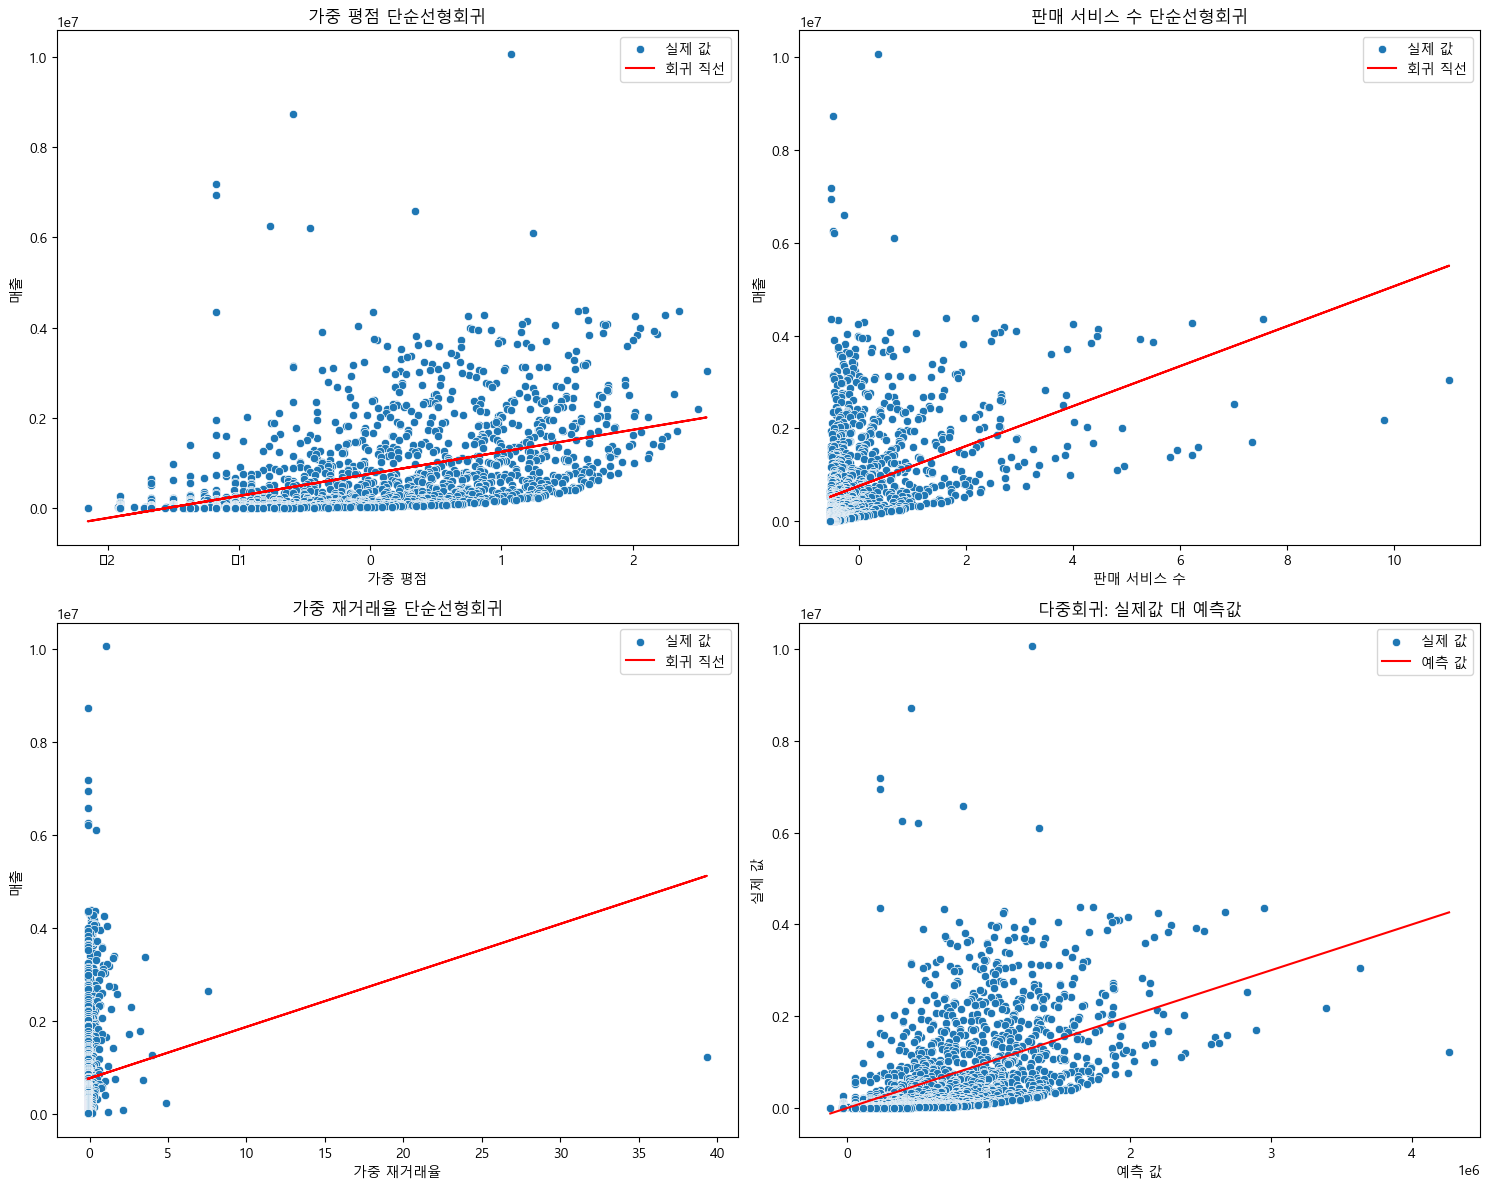

In [42]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
data = expert_df4[['가중 평점', '판매 서비스 수', '가중 재거래율', '매출']].copy()

# 데이터 정규화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['가중 평점', '판매 서비스 수', '가중 재거래율']])
scaled_df = pd.DataFrame(scaled_data, columns=['가중 평점', '판매 서비스 수', '가중 재거래율'])
scaled_df['매출'] = data['매출'].values

# 서브플롯 설정
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# 단순회귀 분석 결과 시각화
for i, var in enumerate(['가중 평점', '판매 서비스 수', '가중 재거래율']):
    X = scaled_df[[var]]
    y = scaled_df['매출']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # 회귀 직선 시각화
    ax = axs[i // 2, i % 2]
    sns.scatterplot(x=scaled_df[var], y=y, ax=ax, label='실제 값')
    ax.plot(scaled_df[var], model.predict(X), color='red', label='회귀 직선')
    ax.set_title(f'{var} 단순선형회귀')
    ax.set_xlabel(var)
    ax.set_ylabel('매출')
    ax.legend()

# 다중회귀 분석 결과 시각화 (실제값 대 예측값)
X_multi = scaled_df[['가중 평점', '판매 서비스 수', '가중 재거래율']]
y_multi = scaled_df['매출']
X_multi = sm.add_constant(X_multi)
model_multi = sm.OLS(y_multi, X_multi).fit()

# 실제값 대 예측값 시각화
sns.scatterplot(x=model_multi.fittedvalues, y=y_multi, ax=axs[1, 1], label='실제 값')
axs[1, 1].plot([min(model_multi.fittedvalues), max(model_multi.fittedvalues)], 
               [min(model_multi.fittedvalues), max(model_multi.fittedvalues)], 
               color='red', label='예측 값')
axs[1, 1].set_title('다중회귀: 실제값 대 예측값')
axs[1, 1].set_xlabel('예측 값')
axs[1, 1].set_ylabel('실제 값')
axs[1, 1].legend()

plt.tight_layout()  # 레이아웃 조정
plt.show()

In [43]:
# VIF 계산
X_vif = scaled_df[['가중 평점', '판매 서비스 수', '가중 재거래율']]
X_vif = sm.add_constant(X_vif)  # 상수항 추가

# VIF 계산 함수
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# VIF 계산 및 출력
vif_df = calculate_vif(X_vif)
print("VIF 계산 결과:\n", vif_df)

VIF 계산 결과:
    Variable       VIF
0     const  1.000000
1     가중 평점  1.972493
2  판매 서비스 수  1.968810
3   가중 재거래율  1.002816


In [44]:
# 1. '가중 평점'을 기준으로 내림차순 정렬
data1 = expert_df4.sort_values(by = '가중 평점', ascending = False).reset_index(drop = True)

# 2. 데이터의 상위 20%씩 5그룹으로 나누기
num_rows = len(data1)
group_size = num_rows // 5  # 각 그룹의 크기 계산

# 3. 그룹 번호를 부여
data1['그룹 번호'] = 0
for i in range(5):
    start_idx = i * group_size
    if i < 4:  # 마지막 그룹이 아닌 경우
        end_idx = (i + 1) * group_size
    else:  # 마지막 그룹은 남은 모든 데이터 포함
        end_idx = num_rows
    data1.loc[start_idx:end_idx - 1, '그룹 번호'] = i

# 4. 점수 부여 : 3, 6, 9, 12, 15점 (낮은 그룹이 3점)
score_map = {4: 3, 3: 6, 2: 9, 1: 12, 0: 15}
data1['가중 평점 점수'] = data1['그룹 번호'].map(score_map)

In [45]:
# 1. '판매 서비스 수'를 기준으로 내림차순 정렬
data2 = expert_df4.sort_values(by = '판매 서비스 수', ascending = False).reset_index(drop = True)

# 2. 데이터의 상위 20%씩 5그룹으로 나누기
num_rows = len(data2)
group_size = num_rows // 5  # 각 그룹의 크기 계산

# 3. 그룹 번호를 부여
data2['그룹 번호'] = 0
for i in range(5):
    start_idx = i * group_size
    if i < 4:  # 마지막 그룹이 아닌 경우
        end_idx = (i + 1) * group_size
    else:  # 마지막 그룹은 남은 모든 데이터 포함
        end_idx = num_rows
    data2.loc[start_idx:end_idx - 1, '그룹 번호'] = i

# 4. 점수 부여: 3, 6, 9, 12, 15점 (낮은 그룹이 3점)
score_map = {4: 2, 3: 4, 2: 6, 1: 8, 0: 10}
data2['판매 서비스 수 점수'] = data2['그룹 번호'].map(score_map)

In [46]:
# 1. '가중 재거래율'을 기준으로 내림차순 정렬
data3 = expert_df4.sort_values(by = '가중 재거래율', ascending = False).reset_index(drop = True)

# 2. 데이터의 상위 20%씩 5그룹으로 나누기
num_rows = len(data3)
group_size = num_rows // 5  # 각 그룹의 크기 계산

# 3. 그룹 번호를 부여
data3['그룹 번호'] = 0
for i in range(5):
    start_idx = i * group_size
    if i < 4:  # 마지막 그룹이 아닌 경우
        end_idx = (i + 1) * group_size
    else:  # 마지막 그룹은 남은 모든 데이터 포함
        end_idx = num_rows
    data3.loc[start_idx:end_idx - 1, '그룹 번호'] = i

# 4. 점수 부여: 3, 6, 9, 12, 15점 (낮은 그룹이 3점)
score_map = {4: 1, 3: 2, 2: 3, 1: 4, 0: 5}
data3['가중 재거래율 점수'] = data3['그룹 번호'].map(score_map)

In [47]:
expert_df5 = pd.merge(expert_df4, data1[['판매자', '가중 평점 점수']], on = '판매자', how = 'inner')

In [48]:
expert_df6 = pd.merge(expert_df5, data2[['판매자', '판매 서비스 수 점수']], on = '판매자', how = 'inner')

In [49]:
expert_df7 = pd.merge(expert_df6, data3[['판매자', '가중 재거래율 점수']], on = '판매자', how = 'inner')

In [50]:
expert_df7['총 점수'] = expert_df7['가중 평점 점수'] + expert_df7['판매 서비스 수 점수'] + expert_df7['가중 재거래율 점수']
expert_df7

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,전체 고객 수,재거래 고객 수,재거래율,평점,매출,가중 평점,평균 거래 가격,가중 재거래율,가중 평점 점수,판매 서비스 수 점수,가중 재거래율 점수,총 점수
0,V2_0,김러그,326,147927420,가입,미사용,323,3.0,0.928793,5.0,10068071.15,28.949801,4.484100e+05,416479.876161,15,10,5,30
1,V2_4,에픽핫,18,126229400,가입,미사용,18,0.0,0.000000,5.0,8722822.50,14.722195,7.006372e+06,0.000000,6,4,2,12
2,V2_5,앱플랫폼만드는전문가,6,99299800,가입,미사용,6,0.0,0.000000,5.0,6940631.50,9.729551,1.652498e+07,0.000000,3,2,2,7
3,V2_6,한길소프트,6,99050900,가입,미사용,6,0.0,0.000000,5.0,7179450.75,9.729551,1.650424e+07,0.000000,3,2,2,7
4,V2_7,김케이9089,93,94820200,가입,미사용,93,0.0,0.000000,5.0,6588321.50,22.716474,1.009786e+06,0.000000,12,8,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,V2_2061,web3expert,1,7800,미가입,미사용,1,0.0,0.000000,5.0,416.00,3.465736,6.400000e+03,0.000000,3,2,1,6
1758,V2_2062,enos,2,6950,미가입,미사용,2,0.0,0.000000,5.0,325.00,5.493061,2.500000e+03,0.000000,3,2,1,6
1759,V2_2063,K9027456501,1,5000,미가입,미사용,1,0.0,0.000000,5.0,450.00,3.465736,5.000000e+03,0.000000,3,2,1,6
1760,V2_2064,승쿠딩,1,5000,가입,미사용,1,0.0,0.000000,5.0,375.00,3.465736,5.000000e+03,0.000000,3,2,1,6


In [51]:
# 1. '총 점수' 기준으로 내림차순 정렬
expert_df7 = expert_df7.sort_values(by='총 점수', ascending=False).reset_index(drop=True)

# 2. 20%씩 5개 그룹으로 나누기 (내림차순 기준)
expert_df7['그룹'] = pd.qcut(expert_df7.index, 5, labels=[4, 3, 2, 1, 0])

# 3. 그룹별로 적용 수수료율 부여
fee_rate_map = {0: 9.0, 1: 8.0, 2: 7.0, 3: 6.0, 4: 5.0}
expert_df7['적용 수수료율'] = expert_df7['그룹'].map(fee_rate_map)

expert_df7 = expert_df7.drop(columns=['그룹'])

In [58]:
real_expert_df = expert_df7[['판매자', '가중 평점 점수', '판매 서비스 수 점수',
                             '가중 재거래율 점수', '총 점수', '적용 수수료율']]

# 랜덤으로 5개 행 추출
expert_random_sample = real_expert_df.sample(n = 10, random_state = 10)

expert_random_sample

,판매자,가중 평점 점수,판매 서비스 수 점수,가중 재거래율 점수,총 점수,적용 수수료율
1651,플랜비매니저,3,2,1,6,9.0
1308,0to1,6,4,1,11,8.0
230,아리아리밑,15,10,4,29,5.0
739,애드하우스,9,6,5,20,7.0
452,모자이크맨,12,8,5,25,6.0
1320,devkang,6,4,1,11,8.0
494,큐블리셔,12,8,4,24,6.0
731,io,9,6,5,20,7.0
1212,마루코,6,4,2,12,8.0
174,design2u,15,10,5,30,5.0
